# Set-Up

In [2]:
import os
from lib.train_AI_lib import *

In [3]:
os.chdir('..')
print(os.getcwd())

/content/APS360-2020Summer-Project


In [5]:
import cv2
#### Filters we want to use ####
edgeDetect  = lambda oImg: cv2.Canny(oImg, 125, 200)
edgeDetect2 = lambda fImg: cv2.Canny(fImg, 175, 250)
laplacian   = lambda pImg: cv2.Laplacian(cv2.cvtColor(pImg, cv2.COLOR_BGR2GRAY),cv2.CV_64F)
gradient    = lambda gImg: cv2.morphologyEx(cv2.cvtColor(gImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_GRADIENT, (5,5))
opening     = lambda cImg: cv2.morphologyEx(cv2.cvtColor(cImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_OPEN, kernel)
bilateral   = lambda bImg: cv2.bilateralFilter(cv2.cvtColor(bImg, cv2.COLOR_BGR2GRAY),9,100,100)

In [6]:
class CNN(nn.Module):
    def __init__(self, name):
        super(CNN, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(1,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

In [7]:
torch.cuda.is_available()

True

# Edge Detect 2

In [6]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect2})

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 102.06s | Training Error: 0.9872169467, Training loss: 25.0632024874 | Validation Error: 0.9824561404, Validation loss: 20.1489841390
Epoch 1 | Time Taken: 99.23s | Training Error: 0.9831994156, Training loss: 19.5719735513 | Validation Error: 0.9824561404, Validation loss: 19.1419300344
Epoch 2 | Time Taken: 97.23s | Training Error: 0.9831994156, Training loss: 18.8079262117 | Validation Error: 0.9824561404, Validation loss: 18.3549711383
Epoch 3 | Time Taken: 97.12s | Training Error: 0.9821037253, Training loss: 18.3742384304 | Validation Error: 0.9707602339, Validation loss: 17.9755120984
Epoch 4 | Time Taken: 97.12s | Training Error: 0.9813732652, Training loss: 18.4562949310 | Validation Error: 0.9736842105, Validation loss: 18.2020457579
Epoch 5 | Time Taken: 98.43s | Training Error: 0.9762600438, Training loss: 17.6553723632 | Validation Error: 0.9824561404, Validation loss: 19.6734083246
Epoch 6 | Time Taken: 97.55s 

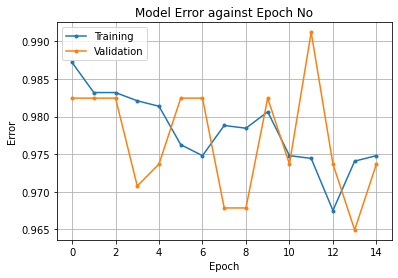

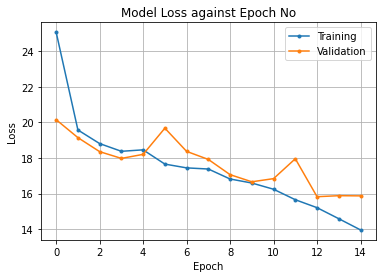

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [25.063202487352527,
  19.571973551305348,
  18.80792621173327,
  18.37423843039135,
  18.45629493097998,
  17.655372363235113,
  17.442748131926553,
  17.378946837324932,
  16.818020224117774,
  16.59241711700599,
  16.242523089187912,
  15.653238461327861,
  15.206813970744104,
  14.586875298166852,
  13.957437113844636],
 [20.148984139012118,
  19.141930034360197,
  18.354971138288217,
  17.975512098425437,
  18.202045757852375,
  19.673408324591094,
  18.36998072989195,
  17.91700410316794,
  17.06202032969202,
  16.660836613852048,
  16.838752055261892,
  17.9559546370878,
  15.823382532156852,
  15.880075766922287,
  15.870363927937094],
 [0.9872169466764061,
  0.9831994156318481,
  0.9831994156318481,
  0.9821037253469685,
  0.9813732651570489,
  0.9762600438276114,
  0.9747991234477721,
  0.9788166544923301,
  0.9784514243973703,
  0.9806428049671293,
  0.9747991234477721,
  0.9744338933528123,
  0.9674945215485756,
  0.9740

In [7]:
my_model = CNN(name = "edgeDetect2")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 15, 
         lr = 0.001)

In [8]:
dir = "/content/drive/My Drive/OpenCV Model/edgedetect2_b64_te10_lr0.001"
if not os.path.exists(dir):
    os.mkdir(dir)

Tested 99.96%

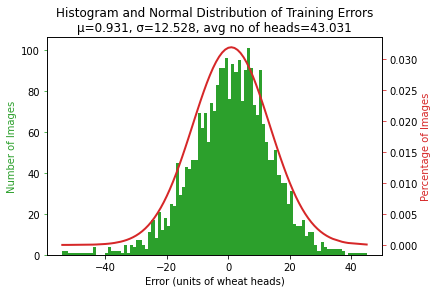

In [9]:
#net = exNetClass('netA'); net.cuda()
netPath = '/content/drive/My Drive/OpenCV Model/edgedetect2_b64_te10_lr0.001'
#net.load_state_dict(torch.load(netPath+'/model_epoch9'))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect2})
_ = regresAnalysis(my_model, trainLoader, netPath)

# Edge Detect 1 

In [8]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect})

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 112.18s | Training Error: 0.9883126370, Training loss: 29.3642503854 | Validation Error: 0.9824561404, Validation loss: 20.7317526933
Epoch 1 | Time Taken: 114.97s | Training Error: 0.9795471147, Training loss: 20.3258830533 | Validation Error: 0.9970760234, Validation loss: 20.7158671123
Epoch 2 | Time Taken: 112.68s | Training Error: 0.9831994156, Training loss: 19.6706993991 | Validation Error: 0.9766081871, Validation loss: 19.6888643219
Epoch 3 | Time Taken: 111.89s | Training Error: 0.9861212564, Training loss: 19.4327142509 | Validation Error: 0.9795321637, Validation loss: 18.7412633528
Epoch 4 | Time Taken: 112.44s | Training Error: 0.9762600438, Training loss: 19.4822572116 | Validation Error: 0.9795321637, Validation loss: 19.2583615857
Epoch 5 | Time Taken: 113.00s | Training Error: 0.9835646457, Training loss: 18.2957455996 | Validation Error: 0.9736842105, Validation loss: 18.3223212806
Epoch 6 | Time Taken: 11

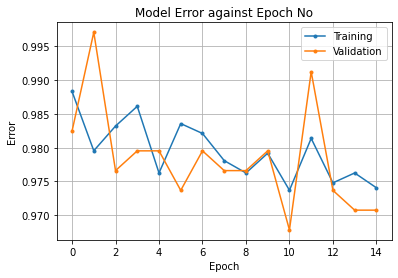

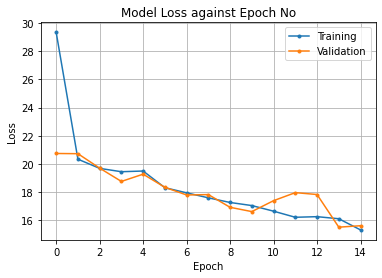

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [29.364250385374202,
  20.325883053324567,
  19.670699399149456,
  19.432714250943924,
  19.48225721164823,
  18.295745599596653,
  17.929826475432918,
  17.573867080599307,
  17.24250353368392,
  17.02259896885178,
  16.622253794139954,
  16.18883309497191,
  16.231857430080222,
  16.084531368110667,
  15.288842951446721],
 [20.73175269328284,
  20.7158671122661,
  19.688864321864813,
  18.74126335281747,
  19.258361585731972,
  18.322321280583722,
  17.77647830038161,
  17.803726298773142,
  16.898672434850297,
  16.593296028488275,
  17.37113946672797,
  17.943531393818446,
  17.80921419492139,
  15.484987881398425,
  15.587155941601067],
 [0.9883126369612856,
  0.9795471146822499,
  0.9831994156318481,
  0.9861212563915267,
  0.9762600438276114,
  0.9835646457268079,
  0.9821037253469685,
  0.9780861943024105,
  0.9762600438276114,
  0.9791818845872899,
  0.9737034331628927,
  0.9813732651570489,
  0.9747991234477721,
  0.976260

In [9]:
my_model2 = CNN(name = "edgeDetect1")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model2,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 15, 
         lr = 0.001)

In [12]:
dir = "/content/APS360-2020Summer-Project/saved/TrainingRuns/AutoEncTrainer/edgedetect1_b64_te10_lr0.001"
if not os.path.exists(dir):
    os.mkdir(dir)

Tested 99.96%

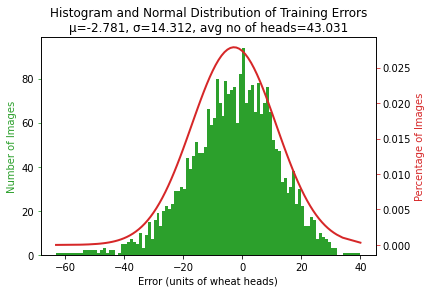

In [14]:
#net = exNetClass('netA'); net.cuda()
netPath = 'saved/TrainingRuns/AutoEncTrainer/edgedetect1_b64_te10_lr0.001'
#net.load_state_dict(torch.load(netPath+'/model_epoch9'))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect})
_ = regresAnalysis(my_model2, trainLoader, netPath)

# Contours

In [18]:
def contour(img):
  gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
  ret,thresh = cv2.threshold(gray_image,158,255,0) 
  #calculate the contours from binary image
  contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
  image4 = cv2.drawContours(img,contours,-1,(0,255,0),3) 
  return image4

def contour1(img):
  gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
  ret,thresh = cv2.threshold(gray_image,145,255,0) 
  #calculate the contours from binary image
  contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
  image4 = cv2.drawContours(img,contours,-1,(0,255,0),3) 
  return image4

In [13]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': contour})

In [14]:
class CNN(nn.Module):
    def __init__(self, name):
        super(CNN, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

CUDA is available!  Training on GPU ...
Epoch 0 | Time Taken: 186.58s | Training Error: 0.9780861943, Training loss: 17.7293709764 | Validation Error: 0.9912280702, Validation loss: 14.1174111949
Epoch 1 | Time Taken: 185.66s | Training Error: 0.9762600438, Training loss: 14.5465518644 | Validation Error: 0.9590643275, Validation loss: 12.5326111790
Epoch 2 | Time Taken: 186.15s | Training Error: 0.9660336012, Training loss: 13.8501229520 | Validation Error: 0.9795321637, Validation loss: 13.3979750533
Epoch 3 | Time Taken: 182.65s | Training Error: 0.9715120526, Training loss: 12.5401566203 | Validation Error: 0.9736842105, Validation loss: 12.0437759548
Epoch 4 | Time Taken: 181.63s | Training Error: 0.9667640614, Training loss: 11.5246420075 | Validation Error: 0.9736842105, Validation loss: 13.3198292258
Epoch 5 | Time Taken: 179.98s | Training Error: 0.9583637692, Training loss: 10.4416119227 | Validation Error: 0.9736842105, Validation loss: 13.2119049599
Epoch 6 | Time Taken: 18

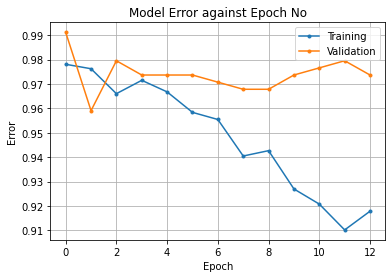

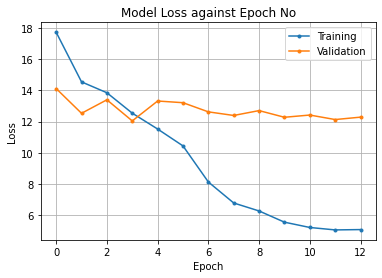

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [17.729370976362134,
  14.54655186443594,
  13.850122952044803,
  12.540156620271834,
  11.524642007487303,
  10.441611922668878,
  8.12810654943307,
  6.781428040040416,
  6.27031352026047,
  5.55140179139202,
  5.211455327525225,
  5.054928344880125,
  5.076375911175796],
 [14.117411194898928,
  12.532611178964254,
  13.397975053317921,
  12.0437759547693,
  13.319829225758463,
  13.211904959944512,
  12.624289654644567,
  12.393456395307764,
  12.705427113325738,
  12.277605671792704,
  12.420402052905372,
  12.13141882011992,
  12.285539171720034],
 [0.9780861943024105,
  0.9762600438276114,
  0.9660336011687363,
  0.9715120525931337,
  0.966764061358656,
  0.95836376917458,
  0.9554419284149014,
  0.9404674945215485,
  0.9426588750913075,
  0.926953981008035,
  0.920745069393718,
  0.9101533966398831,
  0.9178232286340394],
 [0.9912280701754386,
  0.9590643274853801,
  0.97953216374269,
  0.9736842105263158,
  0.9736842105263158,
  0.9

In [19]:
my_modelfinal = CNN(name = "contour")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_modelfinal.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_modelfinal,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 13, 
         lr = 0.001)

In [21]:
dir = "/content/APS360-2020Summer-Project/saved/TrainingRuns/AutoEncTrainer/final_b64_te10_lr0.001"
if not os.path.exists(dir):
    os.mkdir(dir)

Tested 99.96%

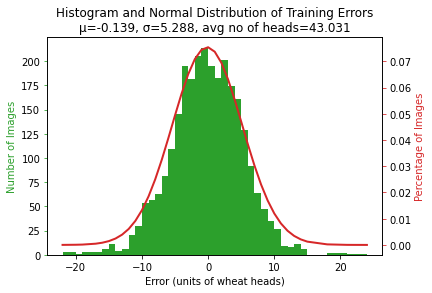

In [22]:
#net = exNetClass('netA'); net.cuda()
netPath = 'saved/TrainingRuns/AutoEncTrainer/final_b64_te10_lr0.001'
#net.load_state_dict(torch.load(netPath+'/model_epoch9'))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': contour})
_ = regresAnalysis(my_modelfinal, trainLoader, netPath)

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': contour1})

In [ ]:
my_model4 = CNN(name = "contour1")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model4.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model4,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

In [ ]:
dir = "/content/APS360-2020Summer-Project/saved/TrainingRuns/OpenCV/contour1_b64_te10_lr0.001"
if not os.path.exists(dir):
    os.mkdir(dir)

In [ ]:
#net = exNetClass('netA'); net.cuda()
netPath = 'saved/TrainingRuns/OpenCV/contour1_b64_te10_lr0.001'
#net.load_state_dict(torch.load(netPath+'/model_epoch9'))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': contour1})
_ = regresAnalysis(my_model4, trainLoader, netPath)